In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import keras

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing.image import array_to_img, img_to_array, load_img

import os
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
!pip3 install imagenetscraper

     |████████████████████████████████| 5.3MB 5.5MB/s 
     |████████████████████████████████| 235kB 44.9MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
  Created wheel for frogress: filename=frogress-0.9.1-cp36-none-any.whl size=14568 sha256=347480c78c198e898f602740cd574b7ca1f7786511dc32d4bc751d71a3b9d6f8
  Stored in directory: /root/.cache/pip/wheels/2e/16/a3/694d34aba3db2000b4497bb0ce3f60f7c593b19c7aa465dad2
Successfully built frogress


In [ ]:
'''
imagenetscraper n07739344 apple
imagenetscraper n07753275 pineapple
imagenetscraper n07735510 pumpkin
imagenetscraper n07747607 orange
imagenetscraper n07756951 watermelon
'''

SyntaxError: ignored

In [ ]:
from bs4 import BeautifulSoup #BeautifulSoup is an HTML parsing library
import numpy as np
import requests
import cv2
import PIL.Image
import urllib

In [ ]:
#(1) apple
apple_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n07739344")
print(apple_page.content)

apple_soup = BeautifulSoup(apple_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line
#print(soup)
#print(soup.prettify())


#(2) pineapple
pine_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n07753275")
print(pine_page.content)

pine_soup = BeautifulSoup(pine_page.content, 'html.parser')

#(3) pumpkin
pump_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n07735510")
print(pump_page.content)

pump_soup = BeautifulSoup(pump_page.content, 'html.parser')

#(4) orange
org_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n07747607")
print(org_page.content)

org_soup = BeautifulSoup(org_page.content, 'html.parser')

#(5) pumpkin
water_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n07756951")
print(water_page.content)

water_soup = BeautifulSoup(water_page.content, 'html.parser')

b'http://farm3.static.flickr.com/2262/1573611688_dad9744fc4.jpg\r\nhttp://farm1.static.flickr.com/65/198902002_a8a22a0104.jpg\r\nhttp://static.flickr.com/1244/1409873239_5943e84c30.jpg\r\nhttp://farm3.static.flickr.com/2297/1716030087_784ecb449b.jpg\r\nhttp://farm1.static.flickr.com/28/63795868_4ef418a0f0.jpg\r\nhttp://farm2.static.flickr.com/1172/1439522724_1a0cd60c2a.jpg\r\nhttp://static.flickr.com/2380/2479768370_8b2e0ac02a.jpg\r\nhttp://farm3.static.flickr.com/2317/2115633893_82117269c7.jpg\r\nhttp://farm3.static.flickr.com/2235/1571253167_46f8a81968.jpg\r\nhttp://farm2.static.flickr.com/1366/532358102_40b8e77971.jpg\r\nhttp://farm4.static.flickr.com/3157/2555686548_04198e4bd5.jpg\r\nhttp://farm4.static.flickr.com/3061/2695361697_23ea7b8b6f.jpg\r\nhttp://farm1.static.flickr.com/32/67303811_39c3fb1f98.jpg\r\nhttp://farm1.static.flickr.com/30/48345787_9083d5b944.jpg\r\nhttp://farm1.static.flickr.com/76/229523956_88ecb4f493.jpg\r\nhttp://farm1.static.flickr.com/129/420563826_ea61c6c08

In [ ]:
apple_str_soup=str(apple_soup)#convert soup to string so it can be split
type(apple_str_soup)
apple_split_urls=apple_str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(apple_split_urls))#print the length of the list so you know how many urls you have

pine_str_soup=str(pine_soup)#convert soup to string so it can be split
type(pine_str_soup)
pine_split_urls=pine_str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(pine_split_urls))#print the length of the list so you know how many urls you have

pump_str_soup=str(pump_soup)#convert soup to string so it can be split
type(pump_str_soup)
pump_split_urls=pump_str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(pump_split_urls))#print the length of the list so you know how many urls you have

org_str_soup=str(org_soup)#convert soup to string so it can be split
type(org_str_soup)
org_split_urls=org_str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(org_split_urls))#print the length of the list so you know how many urls you have

water_str_soup=str(water_soup)#convert soup to string so it can be split
type(water_str_soup)
water_split_urls=water_str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(water_split_urls))#print the length of the list so you know how many urls you have

1160
1210
1542
1445
1354


In [ ]:
!mkdir /content/train 
!mkdir /content/train/apple
!mkdir /content/train/pineapple
!mkdir /content/train/pumpkin
!mkdir /content/train/orange
!mkdir /content/train/watermelon 

!mkdir /content/validation
!mkdir /content/validation/apple
!mkdir /content/validation/pineapple
!mkdir /content/validation/pumpkin
!mkdir /content/validation/orange
!mkdir /content/validation/watermelon

!mkdir /content/test
!mkdir /content/test/apple
!mkdir /content/test/pineapple
!mkdir /content/test/pumpkin
!mkdir /content/test/orange
!mkdir /content/test/watermelon


In [ ]:
!ls /
!ls /content/
!ls /content/train/
!ls /content/validation
!ls /content/test

bin					   etc	  opt	 sys
boot					   home   proc	 tensorflow-1.15.2
content					   lib	  root	 tmp
datalab					   lib32  run	 tools
dev					   lib64  sbin	 usr
dlib-19.18.0-cp27-cp27mu-linux_x86_64.whl  media  srv	 var
dlib-19.18.0-cp36-cp36m-linux_x86_64.whl   mnt	  swift
sample_data  test  train  validation
apple  orange  pineapple  pumpkin  watermelon
apple  orange  pineapple  pumpkin  watermelon
apple  orange  pineapple  pumpkin  watermelon


In [ ]:
img_rows, img_cols = 224, 224
input_shape = (img_rows, img_cols, 3)

def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

#TRAINING IMG
n_of_training_images = 100

def copy_image_to_directory(current_url, path_save, num_files):
  for progress in range(num_files):
    if(progress %20 == 0):
      print(progress)
    if not current_url[progress] == None:
      try:
        img = url_to_image(current_url[progress])
        if(len(img.shape)) == 3:
          save_path = path_save+str(progress)+'.jpg'
          cv2.imwrite(save_path, img)
      except:
        None    

copy_image_to_directory(apple_split_urls, '/content/train/apple/apple_img', 100)
copy_image_to_directory(pine_split_urls, '/content/train/pineapple/pine_img', 100)
copy_image_to_directory(pump_split_urls, '/content/train/pumpkin/pump_img', 100)
copy_image_to_directory(org_split_urls, '/content/train/orange/org_img', 100)
copy_image_to_directory(water_split_urls, '/content/train/watermelon/water_img', 100)
        
        
#Validation data:
n_of_valid_images = 50

def copy_valid_to_directory(current_url, path_save, num_files):
  for progress in range(num_files):
    if(progress%20 == 0):
      print(progress)
    if not current_url[progress] == None:
      try:
        img = url_to_image(current_url[n_of_training_images + progress])
        if(len(img.shape)) == 3:
          save_path = path_save+str(progress)+'.jpg'
          cv2.imwrite(save_path, img)
      except:
        None      

copy_valid_to_directory(apple_split_urls, '/content/validation/apple/apple_img', 50)
copy_valid_to_directory(pine_split_urls, '/content/validation/pineapple/pine_img', 50)
copy_valid_to_directory(pump_split_urls, '/content/validation/pumpkin/pump_img', 50)
copy_valid_to_directory(org_split_urls, '/content/validation/orange/org_img', 50)
copy_valid_to_directory(water_split_urls, '/content/validation/watermelon/water_img', 50)

# TEST DATA

def copy_test_to_directory(current_url, path_save, num_files):
  for progress in range(num_files):
    if(progress%20 == 0):
      print(progress)
    if not current_url[progress] == None:
      try:
        img = url_to_image(current_url[n_of_training_images + n_of_valid_images + progress])
        if(len(img.shape)) == 3:
          save_path = path_save+str(progress)+'.jpg'
          cv2.imwrite(save_path, img)
      except:
        None  

copy_test_to_directory(apple_split_urls, '/content/test/apple/app_img', 30)
copy_test_to_directory(pine_split_urls, '/content/test/pineapple/pine_img', 30)
copy_test_to_directory(pump_split_urls, '/content/test/pumpkin/pump_img', 30)
copy_test_to_directory(org_split_urls, '/content/test/orange/org_img', 30)
copy_test_to_directory(water_split_urls, '/content/test/watermelon/water_img', 30)
        
print("\nTRAIN:\n")          
print("\nlist the files inside apple directory:\n")        
!ls /content/train/apple #list the files inside ships
print("\nlist the files inside pineapple directory:\n")
!ls /content/train/pineapple/ #list the files inside bikes
print("\nlist the files inside pumpkin directory:\n")        
!ls /content/train/pumpkin/ #list the files inside ships
print("\nlist the files inside orange directory:\n")
!ls /content/train/orange/ #list the files inside bikes
print("\nlist the files inside watermelon directory:\n")        
!ls /content/train/watermelon/ #list the files inside ships

print("\nVALIDATION:\n")
print("\nlist the files inside apple directory:\n")        
!ls /content/validation/apple 
print("\nlist the files inside pineapple directory:\n")
!ls /content/validation/pineapple/ 
print("\nlist the files inside pumpkin directory:\n")        
!ls /content/validation/pumpkin/
print("\nlist the files inside orange directory:\n")
!ls /content/validation/orange/
print("\nlist the files inside watermelon directory:\n")        
!ls /content/validation/watermelon/


print("\nTEST:\n")
print("\nlist the files inside apple directory:\n")        
!ls /content/test/apple
print("\nlist the files inside pineapple directory:\n")
!ls /content/test/pineapple/ #list the files inside bikes
print("\nlist the files inside pumpkin directory:\n")        
!ls /content/test/pumpkin/ #list the files inside ships
print("\nlist the files inside orange directory:\n")
!ls /content/test/orange/ #list the files inside bikes
print("\nlist the files inside watermelon directory:\n")        
!ls /content/test/watermelon/ #list the files inside ships 

0
20
40
60
80
0
20
40
60
80
0
20
40
60
80
0
20
40
60
80
0
20
40
60
80
0
20
40
0
20
40
0
20
40
0
20
40
0
20
40
0
20
0
20
0
20
0
20
0
20

TRAIN:


list the files inside apple directory:

apple_img0.jpg	 apple_img34.jpg  apple_img59.jpg  apple_img81.jpg
apple_img13.jpg  apple_img36.jpg  apple_img5.jpg   apple_img82.jpg
apple_img14.jpg  apple_img37.jpg  apple_img60.jpg  apple_img83.jpg
apple_img16.jpg  apple_img38.jpg  apple_img62.jpg  apple_img84.jpg
apple_img18.jpg  apple_img39.jpg  apple_img65.jpg  apple_img86.jpg
apple_img19.jpg  apple_img3.jpg   apple_img67.jpg  apple_img87.jpg
apple_img1.jpg	 apple_img41.jpg  apple_img6.jpg   apple_img88.jpg
apple_img20.jpg  apple_img42.jpg  apple_img70.jpg  apple_img8.jpg
apple_img22.jpg  apple_img43.jpg  apple_img71.jpg  apple_img91.jpg
apple_img23.jpg  apple_img45.jpg  apple_img72.jpg  apple_img93.jpg
apple_img24.jpg  apple_img46.jpg  apple_img73.jpg  apple_img95.jpg
apple_img26.jpg  apple_img47.jpg  apple_img74.jpg  apple_img96.jpg
apple_img27.jp

In [ ]:
import pathlib

root_directory = pathlib.Path('/content');
train_dir = pathlib.Path(root_directory, 'train')
print(train_dir)
validation_dir = pathlib.Path(root_directory, 'validation')
print(validation_dir)
test_dir = pathlib.Path(root_directory, 'test')
print(test_dir)

/content/train
/content/validation
/content/test


In [ ]:
train_apple_dir = pathlib.Path(train_dir, 'apple')
num_train_apple = len(os.listdir(train_apple_dir))
print('Training dataset for apple: ',num_train_apple)
valid_apple_dir = pathlib.Path(validation_dir, 'apple')
num_valid_apple = len(os.listdir(valid_apple_dir))
print('Validation dataset for apple: ',num_valid_apple)
test_apple_dir = pathlib.Path(test_dir, 'apple')
num_test_apple = len(os.listdir(test_apple_dir))
print('Test dataset for apple: ',num_test_apple)

train_pine_dir = pathlib.Path(train_dir, 'pineapple')
num_train_pine = len(os.listdir(train_pine_dir))
print('Training dataset for pineapple: ',num_train_pine)
valid_pineapple_dir = pathlib.Path(validation_dir, 'pineapple')
num_valid_pineapple = len(os.listdir(valid_pineapple_dir))
print('Validation dataset for pineapple: ',num_valid_pineapple)
test_pineapple_dir = pathlib.Path(test_dir, 'pineapple')
num_test_pineapple = len(os.listdir(test_pineapple_dir))
print('Test dataset for pineapple: ',num_test_pineapple)

train_pump_dir = pathlib.Path(train_dir, 'pumpkin')
num_train_pump = len(os.listdir(train_pump_dir))
print('Training dataset for pumpkin: ', num_train_pump)
valid_pump_dir = pathlib.Path(validation_dir, 'pumpkin')
num_valid_pump = len(os.listdir(valid_pump_dir))
print('Validation dataset for pumpkin: ',num_valid_pump)
test_pump_dir = pathlib.Path(test_dir, 'pumpkin')
num_test_pump = len(os.listdir(test_pump_dir))
print('Test dataset for pumpkin: ',num_test_pump)

train_org_dir = pathlib.Path(train_dir, 'orange')
num_train_org = len(os.listdir(train_org_dir))
print('Training dataset for orange: ', num_train_org)
valid_org_dir = pathlib.Path(validation_dir, 'orange')
num_valid_org = len(os.listdir(valid_org_dir))
print('Validation dataset for orange: ',num_valid_org)
test_org_dir = pathlib.Path(test_dir, 'orange')
num_test_org = len(os.listdir(test_org_dir))
print('Test dataset for orange: ',num_test_org)

train_water_dir = pathlib.Path(train_dir, 'watermelon')
num_train_water = len(os.listdir(train_water_dir))
print('Training dataset for watermelon: ', num_train_water)
valid_water_dir = pathlib.Path(validation_dir, 'watermelon')
num_valid_water = len(os.listdir(valid_water_dir))
print('Validation dataset for watermelon: ',num_valid_water)
test_water_dir = pathlib.Path(test_dir, 'watermelon')
num_test_water = len(os.listdir(test_water_dir))
print('Test dataset for watermelon: ',num_test_water)


print('==================================================')
train_image_count = len(list(train_dir.glob('*/*.jpg')))
print('Total train data: ',train_image_count)

valid_image_count = len(list(validation_dir.glob('*/*.jpg')))
print('Total Validation data: ', valid_image_count)

test_image_count = len(list(test_dir.glob('*/*.jpg')))
print('Total Test data: ', test_image_count)

Training dataset for apple:  69
Validation dataset for apple:  35
Test dataset for apple:  19
Training dataset for pineapple:  72
Validation dataset for pineapple:  35
Test dataset for pineapple:  21
Training dataset for pumpkin:  77
Validation dataset for pumpkin:  39
Test dataset for pumpkin:  24
Training dataset for orange:  79
Validation dataset for orange:  44
Test dataset for orange:  20
Training dataset for watermelon:  78
Validation dataset for watermelon:  39
Test dataset for watermelon:  23
Total train data:  375
Total Validation data:  192
Total Test data:  107


In [ ]:
CLASS_NAMES = np.array([item.name for item in test_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES
print()
print(CLASS_NAMES)


['pineapple' 'orange' 'pumpkin' 'apple' 'watermelon']


In [ ]:
batch_size = 40
epochs = 15

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

print(train_image_generator)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(img_rows, img_cols), 
                                                          class_mode='categorical')

print(train_data_gen.image_shape)

valid_data_gen = validation_image_generator.flow_from_directory(batch_size = batch_size,
                                                                directory = validation_dir,
                                                                target_size = (img_rows, img_cols),
                                                                class_mode='categorical')
print(valid_data_gen.image_shape)


test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              shuffle=False,
                                                              target_size=(img_rows, img_cols),
                                                              class_mode='categorical')

len(test_data_gen)
print(test_data_gen.image_shape)

Found 375 images belonging to 5 classes.
(224, 224, 3)
Found 192 images belonging to 5 classes.
(224, 224, 3)
Found 107 images belonging to 5 classes.
(224, 224, 3)


In [ ]:
sample_training_images, sample_training_labels = next(train_data_gen)
sample_validation_images, sample_validation_labels = next(valid_data_gen)
sample_test_images, sample_test_labels = next(test_data_gen)

In [ ]:
model = Sequential([
    Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(img_rows, img_cols ,3)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), padding='valid', activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), padding='valid', activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(), 
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 54, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        3

In [ ]:
history = model.fit_generator(train_data_gen, steps_per_epoch= train_image_count // batch_size, epochs=epochs,
    validation_data=valid_data_gen, validation_steps=valid_image_count // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
9/9 [==============================] - 18s 2s/step - loss: 1.6183 - accuracy: 0.1940 - val_loss: 1.6071 - val_accuracy: 0.2000
Epoch 2/15
9/9 [==============================] - 18s 2s/step - loss: 1.5961 - accuracy: 0.2746 - val_loss: 1.5807 - val_accuracy: 0.2625
Epoch 3/15
9/9 [==============================] - 18s 2s/step - loss: 1.5534 - accuracy: 0.3075 - val_loss: 1.5832 - val_accuracy: 0.2500
Epoch 4/15
9/9 [==============================] - 18s 2s/step - loss: 1.5040 - accuracy: 0.4030 - val_loss: 1.5066 - val_accuracy: 0.3313
Epoch 5/15
9/9 [==============================] - 18s 2s/step - loss: 1.4679 - accuracy: 0.4239 - val_loss: 1.5710 - val_accuracy: 0.3125
Epoch 6/15
9/9 [==============================] - 18s 2s/step - loss: 1.4725 - accuracy: 0.4209 - val_loss: 1.5907 - val_accuracy: 0.2812
Epoch 7/15
9/9 [==============================] - 19s 2s/step - loss: 1.4875 - accuracy: 0.4028 

In [ ]:
test_loss, test_acc = model.evaluate_generator(test_data_gen, steps = 50)
print(test_acc)

Instructions for updating:
Please use Model.evaluate, which supports generators.
0.336448609828949


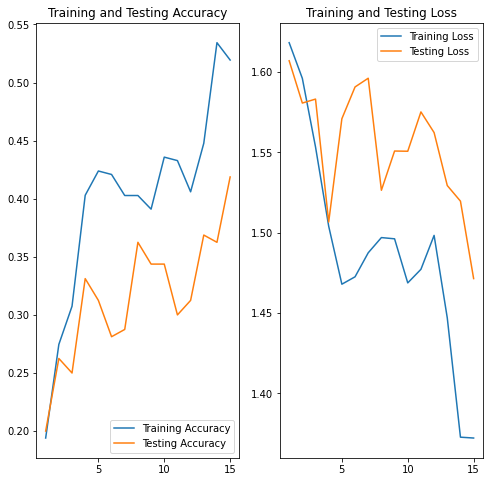

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

#epochs_range = range(epochs)
epochs_range = range(1, len(loss) + 1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Testing Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Testing Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Testing Loss')
plt.legend(loc='upper right')
plt.title('Training and Testing Loss')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
pred = model.predict(test_data_gen)
print(pred)
predictions = model.predict_generator(test_data_gen, test_image_count // batch_size+1)
print(predictions.size)
print(test_data_gen.classes)
y_pred = np.argmax(predictions, axis=1)
print(y_pred)
print('Confusion Matrix')
print(confusion_matrix(test_data_gen.classes, y_pred))
print('Classification Report')

print(classification_report(test_data_gen.classes, y_pred, target_names=CLASS_NAMES))

print('\nPredicted class for test image 0: ', np.argmax(predictions[0]), CLASS_NAMES[np.argmax(predictions[0])])

[[7.32365370e-01 5.52984979e-03 2.51107335e-01 1.09402416e-02
  5.72225654e-05]
 [5.74277639e-01 5.51143254e-04 4.23934072e-01 1.23545679e-03
  1.60423792e-06]
 [9.69577014e-01 5.88736404e-03 2.34984402e-02 9.95052513e-04
  4.21687291e-05]
 [2.22494125e-01 4.98052547e-03 7.60630369e-01 1.15882885e-02
  3.06751579e-04]
 [6.83106706e-02 6.87080392e-05 9.30574179e-01 1.04547816e-03
  9.57086741e-07]
 [8.11946571e-01 1.44976005e-01 1.11286389e-02 3.19481492e-02
  6.69534927e-07]
 [8.96864235e-01 3.36382468e-03 9.69461724e-02 2.77518854e-03
  5.05981698e-05]
 [3.75545174e-01 1.90462364e-04 6.21775270e-01 2.48534279e-03
  3.78639834e-06]
 [5.76968596e-04 7.47718848e-03 2.84097457e-09 9.91945803e-01
  2.69272300e-12]
 [9.76603031e-02 8.65002949e-05 9.00763929e-01 1.48512761e-03
  4.04749790e-06]
 [9.74336982e-01 6.45640539e-03 1.74222142e-02 1.75246142e-03
  3.18443563e-05]
 [9.24042344e-01 1.08691014e-03 7.44323805e-02 4.35492722e-04
  2.97727161e-06]
 [4.63187158e-01 1.08076329e-03 5.215165

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top = False, input_shape=(img_rows, img_cols, 3))

conv_base.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 32
epochs = 20

In [ ]:
def extract_features(directory, sample_count, shuffle_value):
  features = np.zeros(shape=(sample_count, 7, 7, 512))
  labels = np.zeros(shape=(sample_count, 5)) 
  generator = datagen.flow_from_directory(directory, target_size = (img_cols,img_rows), 
                                          batch_size = batch_size, class_mode = 'categorical', 
                                          shuffle = shuffle_value)
  i = 0
  for inputs_batch, labels_batch in generator:
      features_batch = conv_base.predict(inputs_batch)
      features[i * batch_size : (i + 1) * batch_size] = features_batch
      labels[i * batch_size : (i + 1) * batch_size] = labels_batch
      i+=1
      if i * batch_size >= sample_count:
        break
  return features, labels, generator

train_features, train_labels, test_generator = extract_features(train_dir, train_image_count, True)
validation_features, validation_labels, validation_generator = extract_features(validation_dir, valid_image_count, False)
test_features, test_labels, test_generator = extract_features(test_dir, test_image_count, False)

Found 375 images belonging to 5 classes.
Found 192 images belonging to 5 classes.
Found 107 images belonging to 5 classes.


In [ ]:
train_features = np.reshape(train_features, (train_image_count, 7 * 7 * 512))
print(train_features.shape)

validation_features = np.reshape(validation_features, (valid_image_count, 7 * 7 * 512))
print(validation_features.shape)

test_features = np.reshape(test_features, (test_image_count, 7 * 7 * 512))
print(test_features.shape)

(375, 25088)
(192, 25088)
(107, 25088)


In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_dim = 7*7*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 2565      
Total params: 12,848,133
Trainable params: 12,848,133
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_features, train_labels, epochs = epochs,
                    batch_size= batch_size,
                    validation_data = (validation_features, validation_labels))

Train on 375 samples, validate on 192 samples
Epoch 1/20
375/375 [==============================] - 3s 7ms/step - loss: 5.2468 - accuracy: 0.3200 - val_loss: 2.4250 - val_accuracy: 0.4062
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 1.4473 - accuracy: 0.6373 - val_loss: 1.0872 - val_accuracy: 0.6198
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.6081 - accuracy: 0.7760 - val_loss: 0.9991 - val_accuracy: 0.6250
Epoch 4/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3440 - accuracy: 0.8800 - val_loss: 0.9679 - val_accuracy: 0.6458
Epoch 5/20
375/375 [==============================] - 3s 7ms/step - loss: 0.2537 - accuracy: 0.9093 - val_loss: 0.9967 - val_accuracy: 0.6458
Epoch 6/20
375/375 [==============================] - 2s 7ms/step - loss: 0.1626 - accuracy: 0.9440 - val_loss: 1.1494 - val_accuracy: 0.5885
Epoch 7/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1189 - accuracy: 0.9733 - 

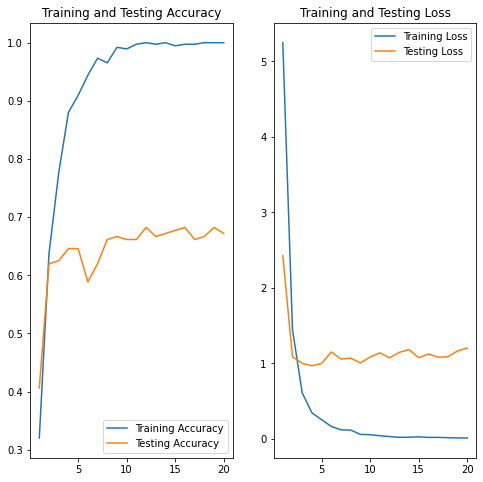

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

#epochs_range = range(epochs)
epochs_range = range(1, len(loss) + 1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Testing Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Testing Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Testing Loss')
plt.legend(loc='upper right')
plt.title('Training and Testing Loss')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_features, test_labels)
print(test_acc)

107/107 [==============================] - 0s 963us/step
0.7570093274116516


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict_classes(test_features)
print(predictions.size)
#y_pred = np.argmax(predictions, axis=1)
y_pred = predictions
print('Confusion Matrix')
#print(test_generator.classes)
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')

print(classification_report(test_generator.classes, y_pred, target_names=CLASS_NAMES))

107
Confusion Matrix
[[18  0  1  0  0]
 [ 1 16  0  1  2]
 [ 0  1 12  2  6]
 [ 1  1  0 22  0]
 [ 1  1  3  5 13]]
Classification Report
              precision    recall  f1-score   support

   pineapple       0.86      0.95      0.90        19
      orange       0.84      0.80      0.82        20
     pumpkin       0.75      0.57      0.65        21
       apple       0.73      0.92      0.81        24
  watermelon       0.62      0.57      0.59        23

    accuracy                           0.76       107
   macro avg       0.76      0.76      0.75       107
weighted avg       0.75      0.76      0.75       107



In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Reds):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = cm*100
    print('\nNormalized Confusion Matrix')
  else: 
    print('\nConfusion Matrix, without Normalization')
   
  print(cm)
  print()

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=90)
  plt.yticks(tick_marks, classes)


  fmt = '.0f' if normalize else 'd'
  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
     plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()  


Confusion Matrix, without Normalization
[[18  0  1  0  0]
 [ 1 16  0  1  2]
 [ 0  1 12  2  6]
 [ 1  1  0 22  0]
 [ 1  1  3  5 13]]



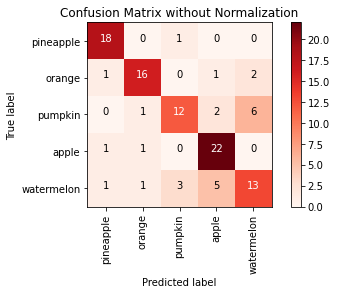

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

#y_pred = np.argmax(predictions, axis = 1)
y_pred = predictions
cnf_matrix = confusion_matrix(test_data_gen.classes, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=CLASS_NAMES, title ='Confusion Matrix without Normalization')


In [ ]:
valid_filenames = validation_generator.filenames

valid_ground_truth = validation_generator.classes

val_label2index = validation_generator.class_indices

# getting the mapping from class index to class label
val_idx2label = dict((v,k) for k,v in val_label2index.items())

val_predictions = model.predict_classes(validation_features)
valid_prob = model.predict(validation_features)

val_errors = np.where(val_predictions != valid_ground_truth)[0]
print("No of error = {}/{}".format(len(val_errors), valid_image_count))

No of error = 63/192


In [ ]:
test_filenames = test_generator.filenames
test_ground_truth = test_generator.classes
test_label2index = test_generator.class_indices
test_idx2label = dict((v, k) for k, v in test_label2index.items())

test_predictions = model.predict_classes(test_features)
test_prob = model.predict(test_features)

test_errors = np.where(test_predictions != test_ground_truth)[0]
print("No of error = {}/{}".format(len(test_errors), test_image_count))

No of error = 26/107


In [ ]:
print(test_predictions)
print(test_prob)

[0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 4 1 1 3 1 1 1 1
 1 4 2 3 2 4 4 3 2 2 2 4 2 4 2 2 2 4 2 4 1 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 0 1 4 2 2 4 4 4 4 4 2 0 4 3 3 4 3 1 3 4 4 4 4 4 3]
[[8.84e-01 2.25e-03 1.02e-01 5.48e-04 1.14e-02]
 [9.99e-01 5.08e-04 7.64e-05 3.79e-05 7.71e-05]
 [1.00e+00 4.09e-05 2.30e-04 6.65e-06 1.99e-04]
 [5.77e-01 5.28e-03 6.41e-02 3.50e-01 4.26e-03]
 [9.90e-01 7.27e-04 3.10e-04 5.47e-03 3.79e-03]
 [9.99e-01 2.85e-04 5.53e-04 2.83e-05 2.10e-04]
 [9.91e-01 2.89e-05 6.02e-03 6.75e-05 2.65e-03]
 [9.90e-01 6.49e-04 1.66e-03 2.34e-04 7.93e-03]
 [5.13e-01 2.76e-01 2.07e-05 2.10e-01 6.87e-04]
 [1.00e+00 3.12e-05 3.01e-06 5.81e-05 3.00e-05]
 [1.00e+00 9.06e-06 1.28e-05 1.45e-05 2.18e-05]
 [4.49e-01 1.14e-03 5.45e-01 4.99e-03 2.75e-04]
 [1.00e+00 1.34e-04 4.62e-05 8.37e-05 5.02e-05]
 [8.79e-01 1.63e-03 8.60e-02 1.37e-03 3.25e-02]
 [1.00e+00 1.53e-05 2.40e-04 2.37e-05 2.04e-04]
 [1.00e+00 2.23e-05 4.10e-05 2.36e-05 5.74e-05]
 [9.60e-01 1.8

1
orange
True label : apple, Prediction : orange, confidence : 0.890


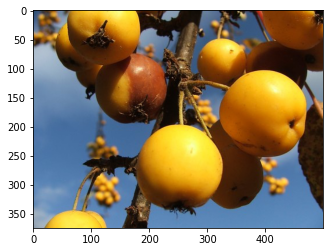

2
pineapple
True label : apple, Prediction : pineapple, confidence : 0.725


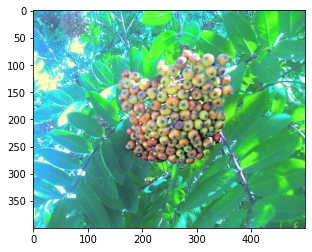

2
pineapple
True label : apple, Prediction : pineapple, confidence : 0.627


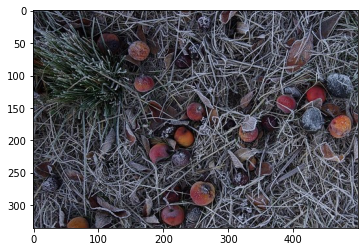

0
apple
True label : orange, Prediction : apple, confidence : 0.630


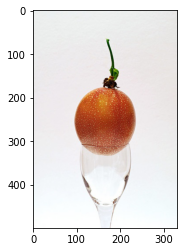

4
watermelon
True label : orange, Prediction : watermelon, confidence : 0.793


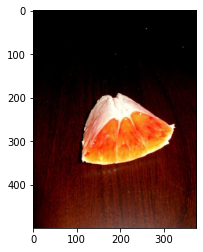

3
pumpkin
True label : orange, Prediction : pumpkin, confidence : 0.702


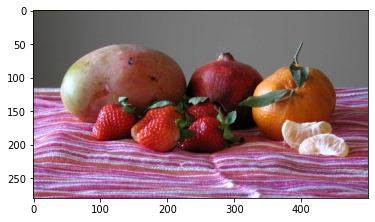

4
watermelon
True label : orange, Prediction : watermelon, confidence : 0.968


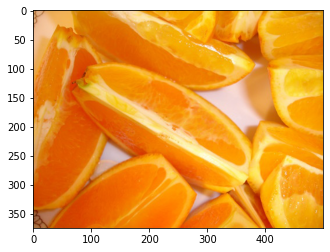

3
pumpkin
True label : pineapple, Prediction : pumpkin, confidence : 0.998


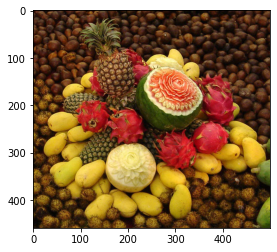

4
watermelon
True label : pineapple, Prediction : watermelon, confidence : 0.862


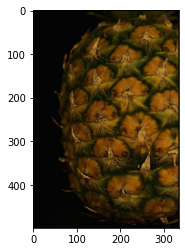

4
watermelon
True label : pineapple, Prediction : watermelon, confidence : 0.539


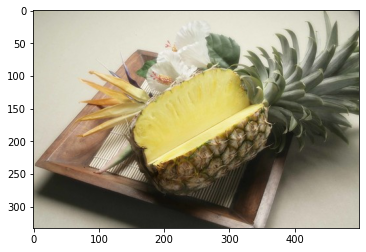

3
pumpkin
True label : pineapple, Prediction : pumpkin, confidence : 0.690


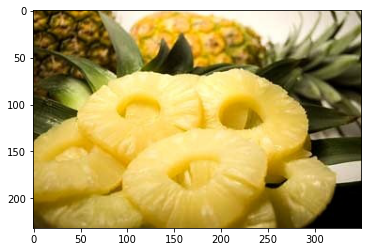

4
watermelon
True label : pineapple, Prediction : watermelon, confidence : 0.983


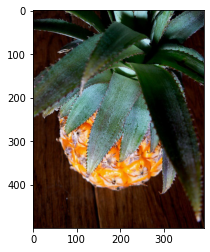

4
watermelon
True label : pineapple, Prediction : watermelon, confidence : 0.524


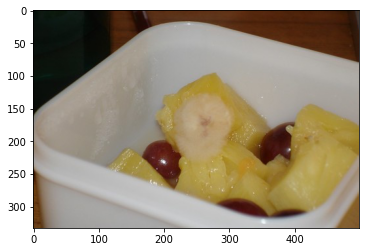

1
orange
True label : pineapple, Prediction : orange, confidence : 0.986


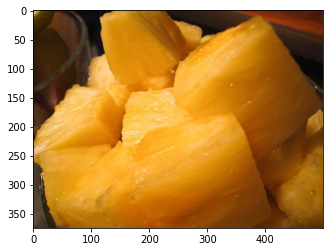

0
apple
True label : pumpkin, Prediction : apple, confidence : 0.913


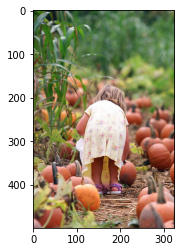

1
orange
True label : pumpkin, Prediction : orange, confidence : 0.726


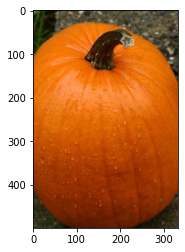

2
pineapple
True label : watermelon, Prediction : pineapple, confidence : 0.958


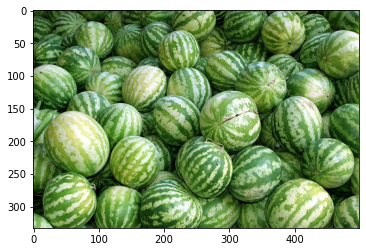

2
pineapple
True label : watermelon, Prediction : pineapple, confidence : 0.990


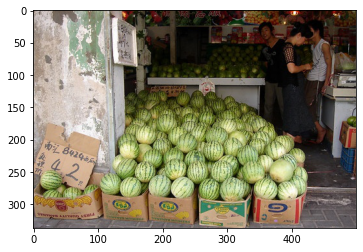

2
pineapple
True label : watermelon, Prediction : pineapple, confidence : 0.975


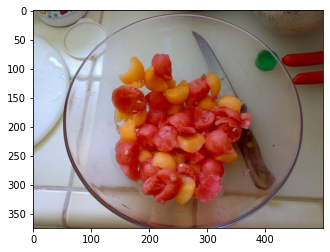

0
apple
True label : watermelon, Prediction : apple, confidence : 0.691


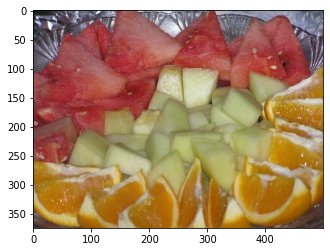

3
pumpkin
True label : watermelon, Prediction : pumpkin, confidence : 0.852


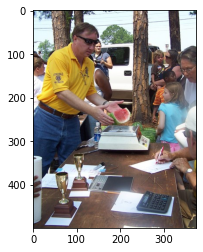

3
pumpkin
True label : watermelon, Prediction : pumpkin, confidence : 0.899


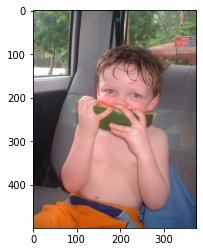

1
orange
True label : watermelon, Prediction : orange, confidence : 0.811


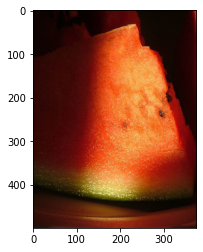

3
pumpkin
True label : watermelon, Prediction : pumpkin, confidence : 0.450


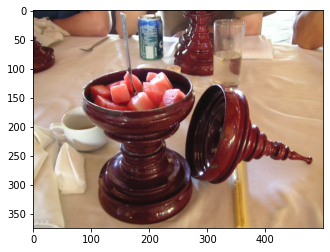

In [ ]:
for i in range(len(test_errors)):
  pred_class = np.argmax(test_prob[test_errors[i]])
  print(pred_class)
  pred_label = test_idx2label[pred_class]
  print(pred_label)

  print('True label : {}, Prediction : {}, confidence : {:.3f}'.format(
      test_filenames[test_errors[i]].split('/')[0],
      pred_label,
      test_prob[test_errors[i]][pred_class]))
  

  original = load_img('{}/{}'.format(test_dir, test_filenames[test_errors[i]]))
  plt.imshow(original)
  plt.show()